<a href="https://colab.research.google.com/github/walwaljj/colab/blob/main/%EB%AC%B8%EC%9E%90%EC%B6%94%EC%B6%9C1102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

/
Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/yolov4_tiny/darknet

/content/drive/MyDrive/yolov4_tiny/darknet


In [3]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 7.2 MB/s 
     |████████████████████████████████| 47.6 MB 2.1 MB/s 
     |████████████████████████████████| 604 kB 55.6 MB/s 
     |████████████████████████████████| 120 kB 38.1 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


(44, 177, 3) <class 'numpy.ndarray'>
[264 295 177  44]


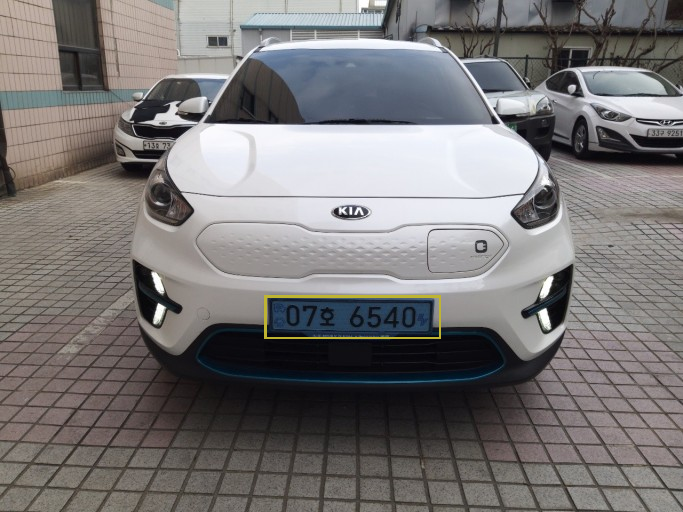

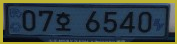

07호 6540
07호 6540
07호 6540
07호 6540
07호 6540
07호 6540
07호 6540


In [23]:
import cv2
from PIL import Image
import imutils
from google.colab.patches import cv2_imshow
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import easyocr
import numpy as np


img_path = '/content/drive/MyDrive/yolov4_tiny/testimg/전기차2.jpg'
img = cv2.imread(img_path)

with open('/content/drive/MyDrive/yolov4_tiny/darknet/data/obj.names', 'r') as f:
    classes = f.read().splitlines()

#cfg 파일에 batch, subdivisions 는 둘 다 1이어야함

net = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/yolov4_tiny/darknet/cfg/yolov4-tiny-custom.cfg', '/content/drive/MyDrive/yolov4_tiny/training/yolov4_tiny_test3/yolov4-tiny-custom_best.weights')

model = cv2.dnn_DetectionModel(net)
model.setInputParams(scale=1 / 255, size=(416, 416), swapRB=True)

classIds, scores, boxes = model.detect(img, confThreshold=0.6, nmsThreshold=0.4)

clss = classIds.tolist()

# # 검출된 bbox 중, 클래스가 0(norm), 1(elec) 이면 이미지 출력

box = boxes[0]
w = box[0]
h = box[1]
x = box[2]
y = box[3]
bbox = img[h:y+h, w:x+w]# 여기 변경
print(bbox.shape,type(bbox))
print(box)


cv2.rectangle(bbox, (0,0), (x, y), (50,180,190), 3)

cv2_imshow(img)
cv2_imshow(bbox)
# ------------------------------------------------------------------ OCR
reader = easyocr.Reader(['ko','en'])
result = reader.readtext(bbox)


result_list = []
result_str = ''

for i in result :
  for j in i[1] :
    if('0'<=j<='9' or '가'<=j<='힣'):
      # print(j,end='')
      result_list.append(j)
      result_str += j
    else:
      continue

for n in result_list :
  if '가'<=n<='힣' :
    # print(n)
    # print(result_list.index(n))
    a=result_list[:result_list.index(n)+1]
    b=result_list[result_list.index(n)+1:]
    
    if 3<=len(a)<=4 :
      a = ''.join(a)
    else :
      print('a err')
    
    if len(b) == 4 :
      b = ''.join(b)
    else :
      print('b err')

    print(a,b)